<a href="https://colab.research.google.com/github/prajwalnigam321/Data-Science-and-Machine-Learning/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})

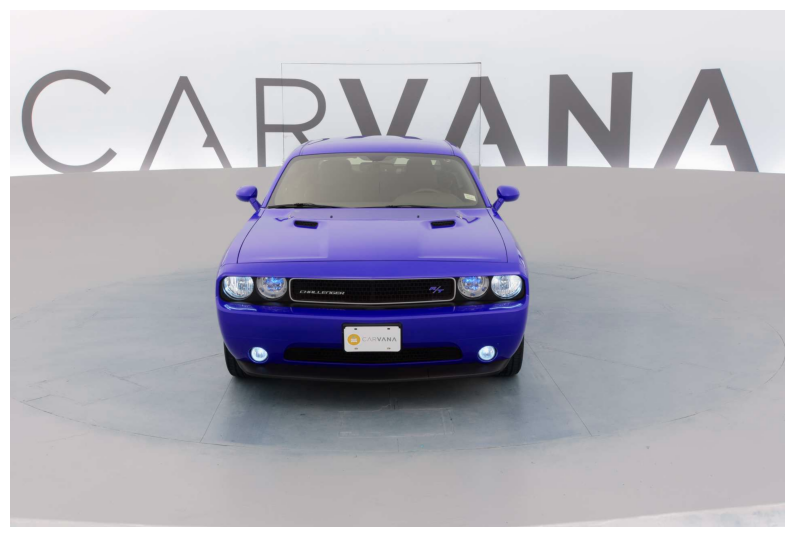

In [ ]:
img=cv2.imread('car1.jpg')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.show()

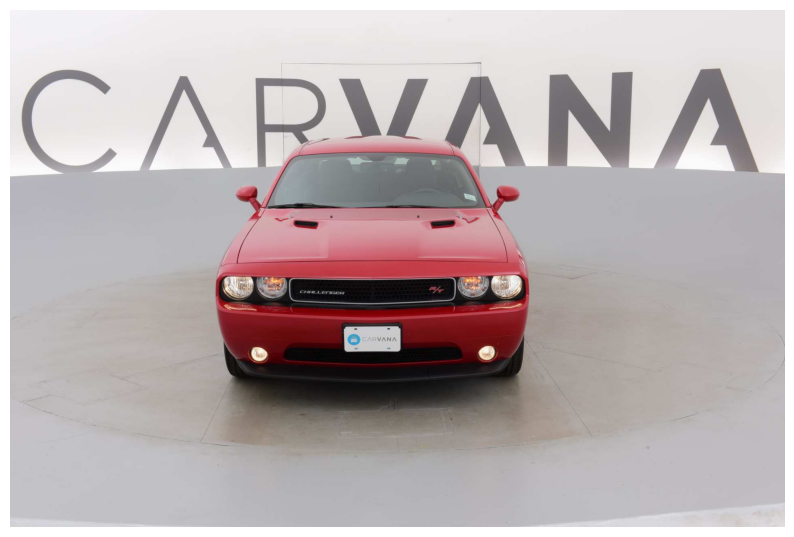

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.show()

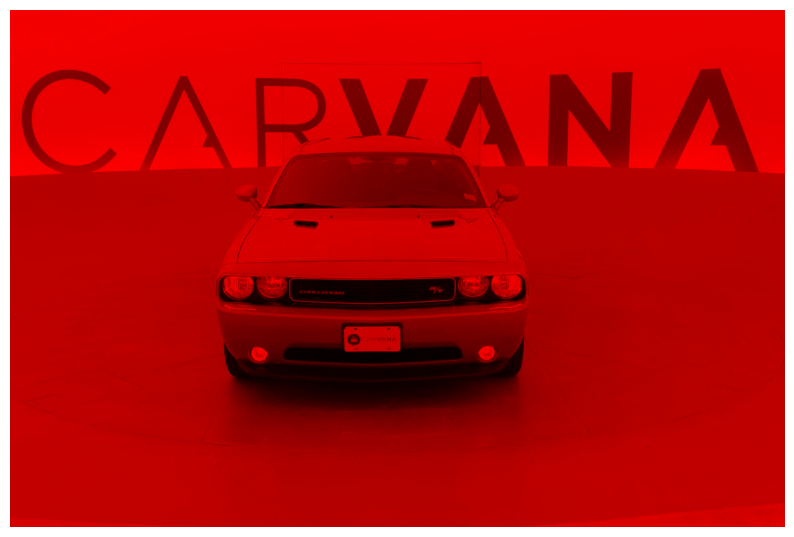

In [ ]:
red=np.copy(img)
red[:,:,1]=0
red[:,:,2]=0
plt.figure(figsize=(10,10))
plt.imshow(red)
plt.axis(False)
plt.show()



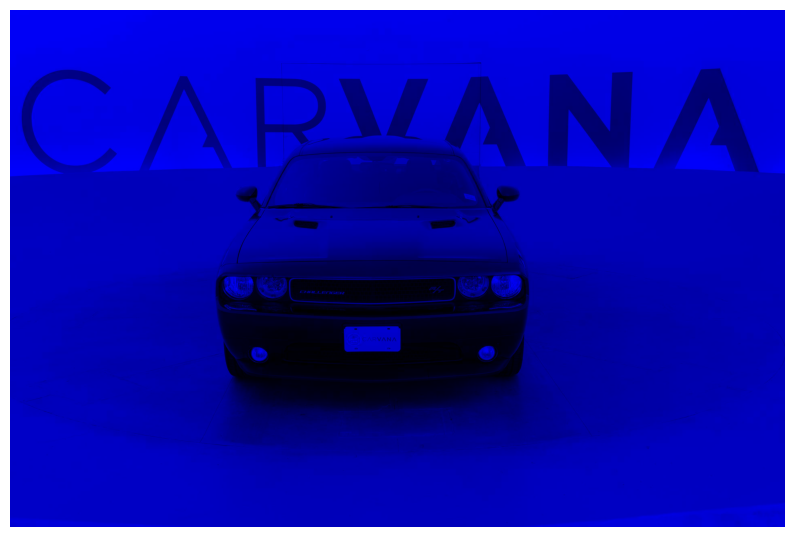

In [ ]:
red=np.copy(img)
red[:,:,0]=0
red[:,:,1]=0
plt.figure(figsize=(10,10))
plt.imshow(red)
plt.axis(False)
plt.show()

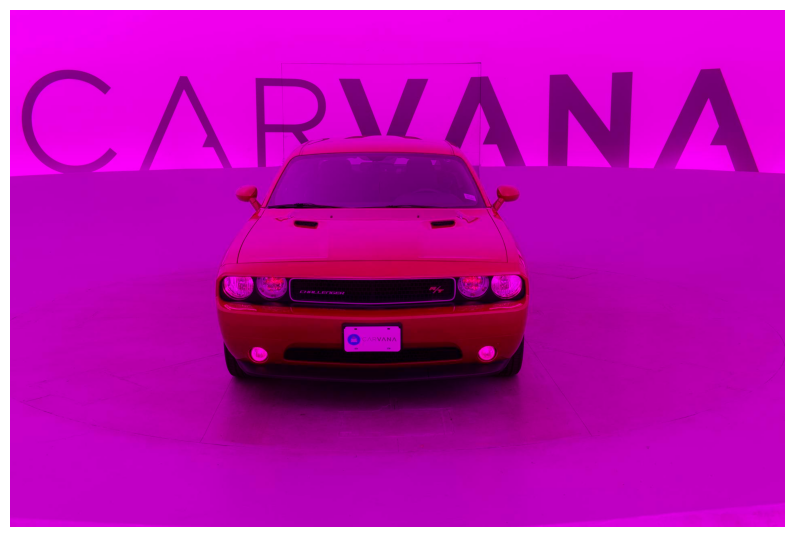

In [ ]:
red=np.copy(img)
red[:,:,1]=0
plt.figure(figsize=(10,10))
plt.imshow(red)
plt.axis(False)
plt.show()


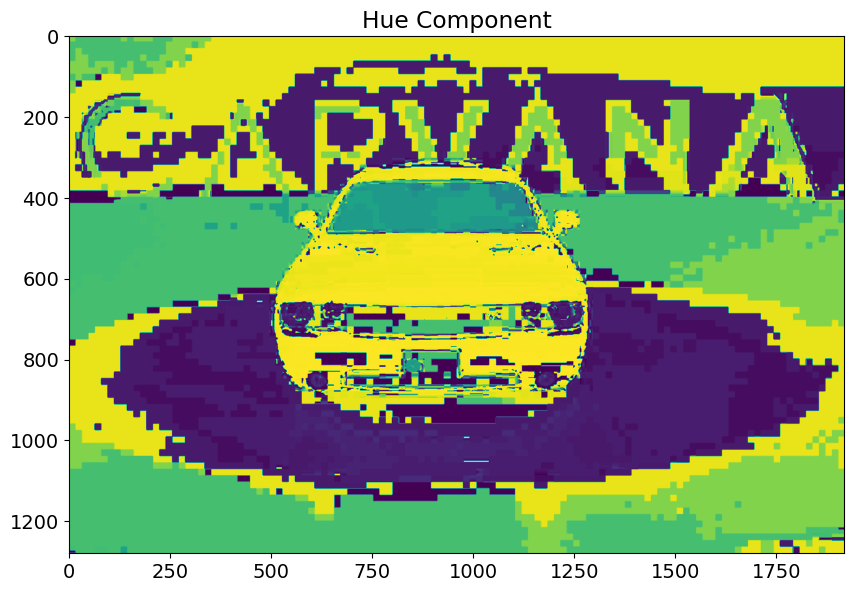

In [ ]:
img1=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.title('Hue Component')
plt.imshow(img1[:,:,0])
plt.show()

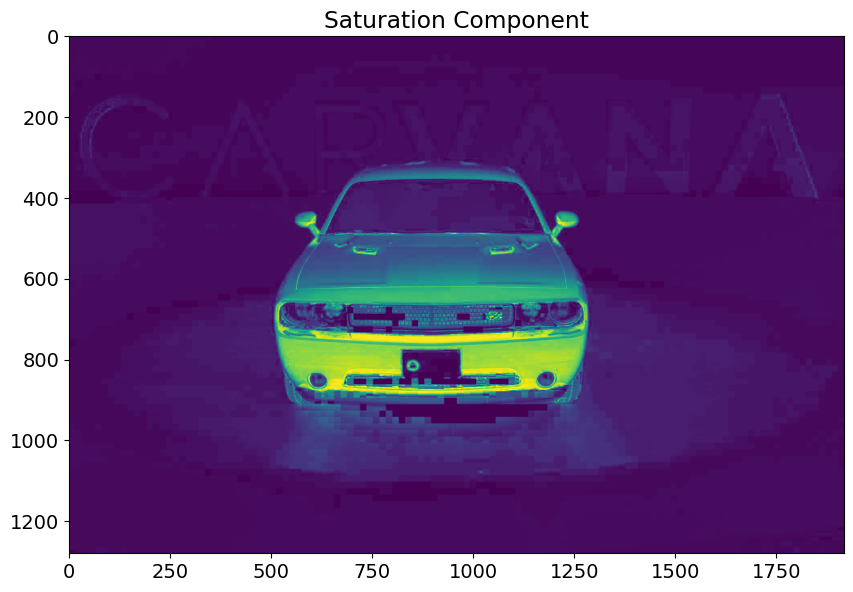

In [ ]:
img1=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.title('Saturation Component')
plt.imshow(img1[:,:,1])
plt.show()

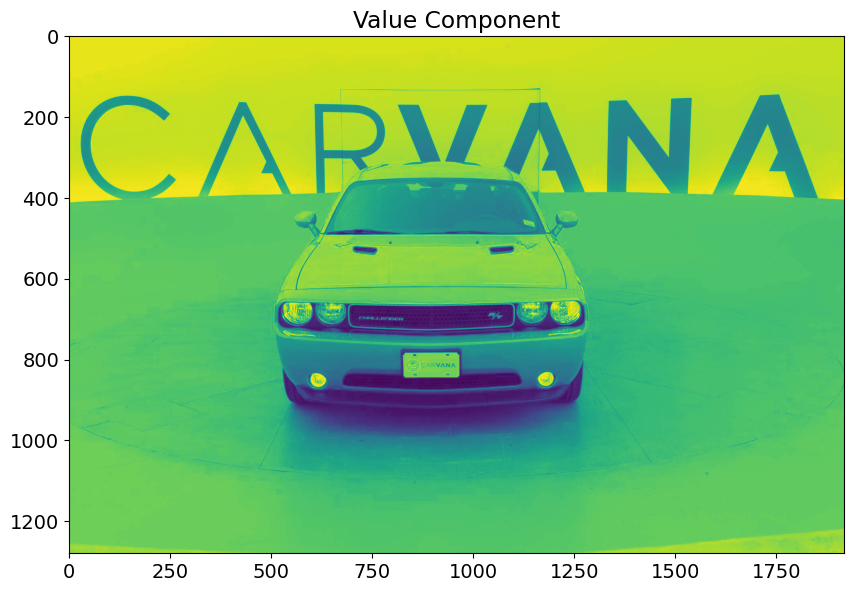

In [ ]:
img1=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.title('Value Component')
plt.imshow(img1[:,:,2])
plt.show()

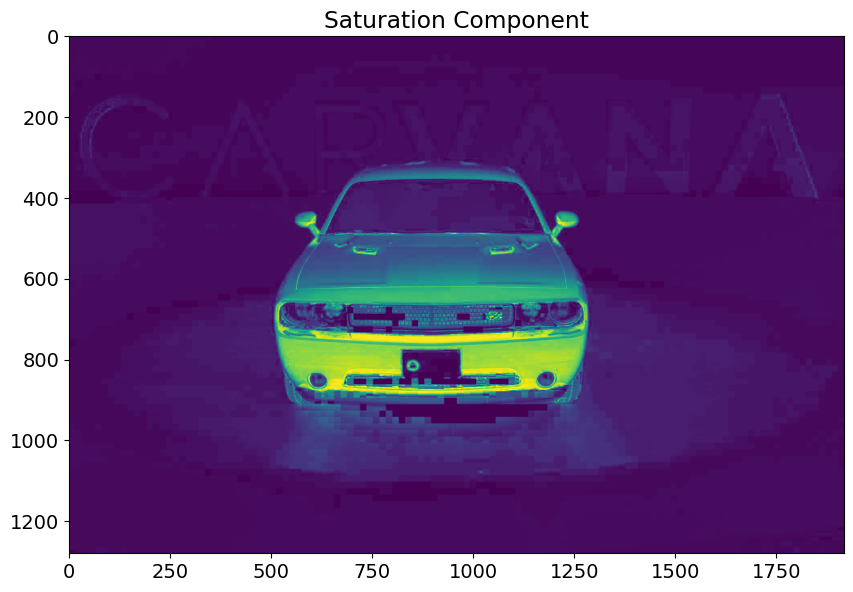

In [ ]:
img1=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.title('Saturation Component')
plt.imshow(img1[:,:,1])
plt.show()

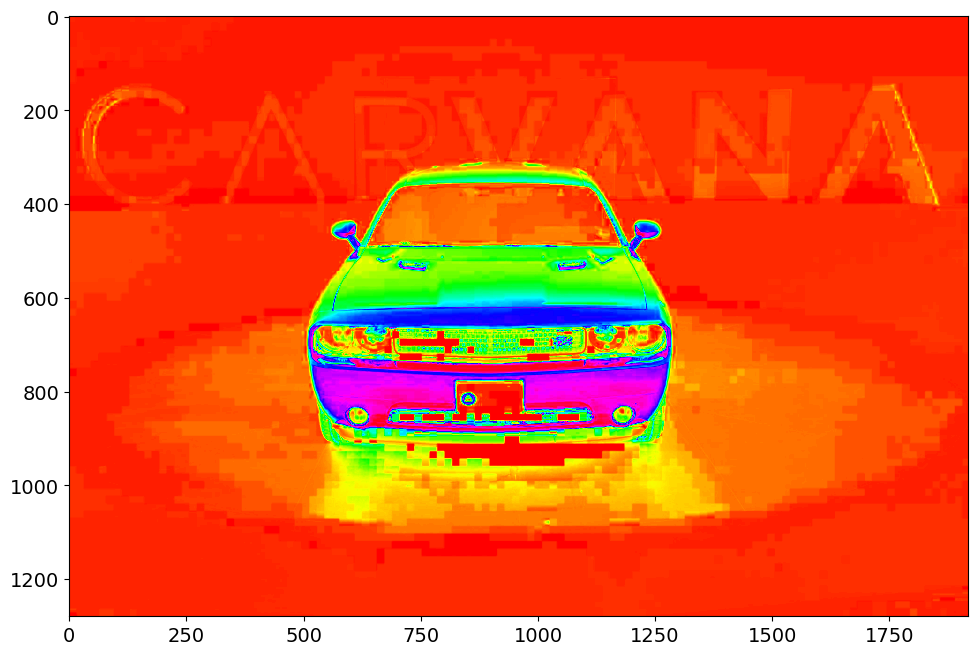

In [ ]:
img2=img1[:,:,1]
kernal=(1,1)
plt.figure(figsize=(10,10))
smothen_img=cv2.blur(img2,kernal)
plt.imshow(smothen_img,cmap='hsv')

plt.tight_layout()
plt.show()

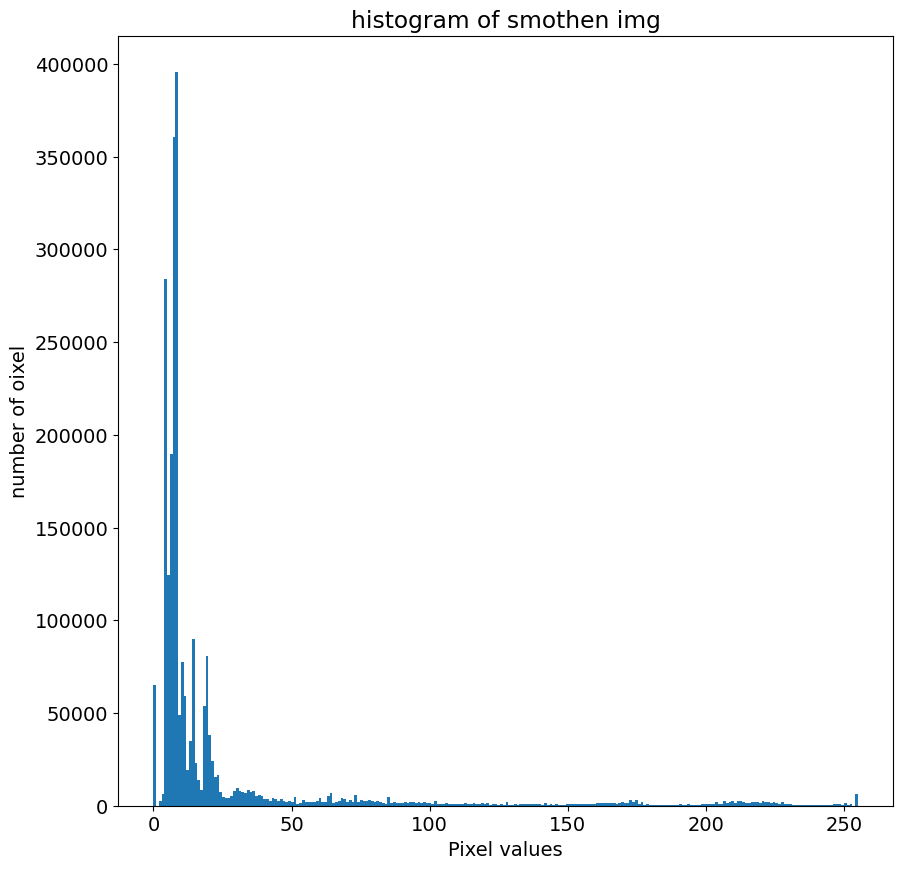

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(smothen_img.ravel(),bins=256)
plt.title('histogram of smothen img')
plt.xlabel('Pixel values')
plt.ylabel('number of oixel')
plt.savefig('histogram')
plt.show()

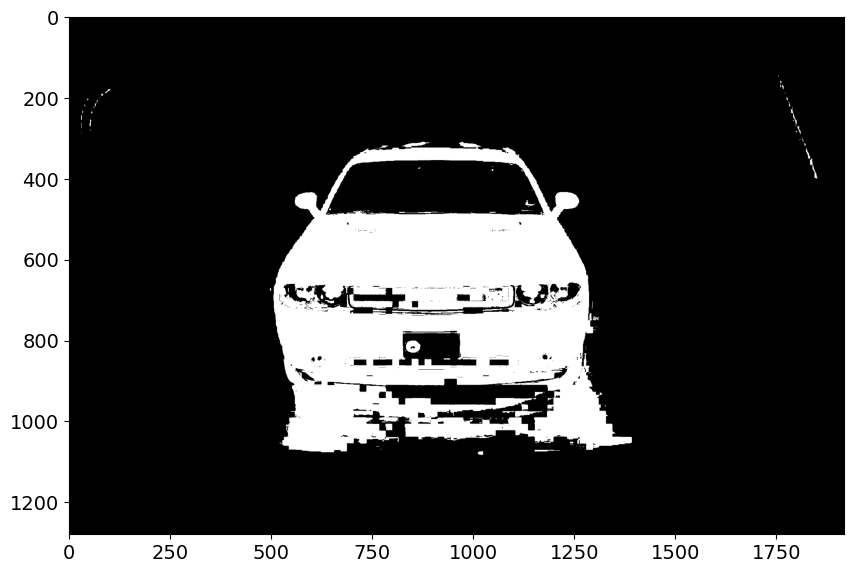

In [ ]:
_,threshimg=cv2.threshold(smothen_img,30,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.imshow(threshimg,cmap='gray')
plt.show()

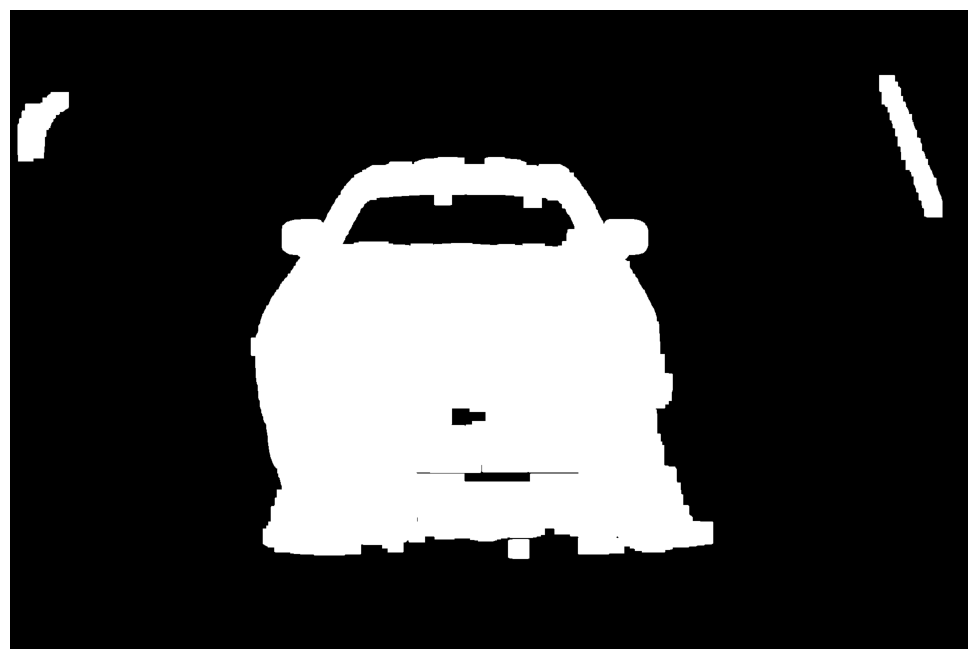

In [ ]:
dilate1=cv2.dilate(threshimg,None,iterations=15)
plt.figure(figsize=(10,10))
plt.imshow(dilate1,cmap='gray')
plt.axis(False)
plt.tight_layout()
plt.show()


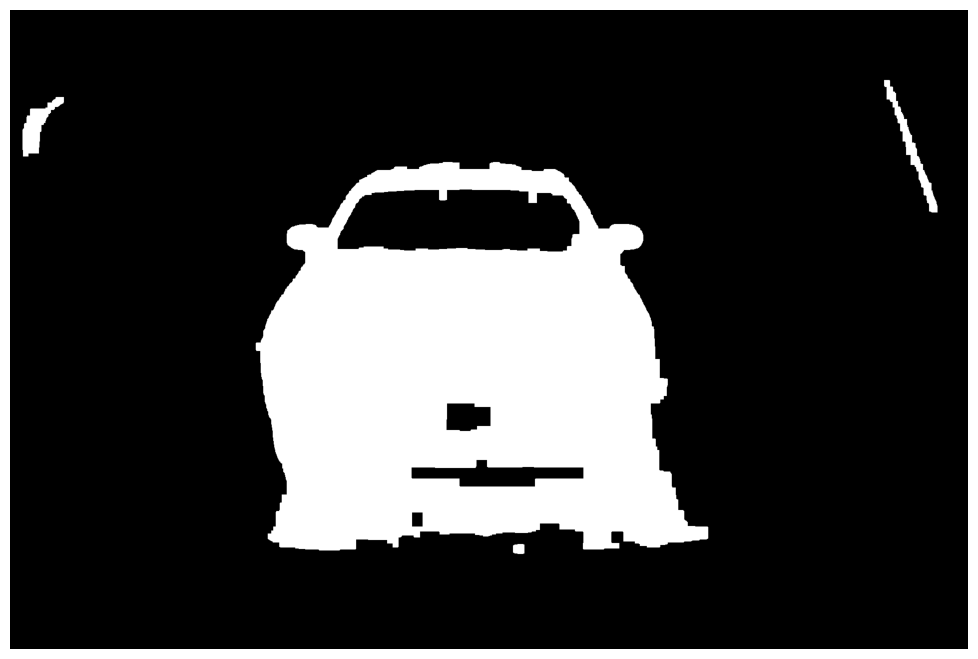

In [ ]:
dilate2=cv2.erode(dilate1,None,iterations=10)
plt.figure(figsize=(10,10))
plt.imshow(dilate2,cmap='gray')
plt.axis(False)
plt.tight_layout()
plt.show()

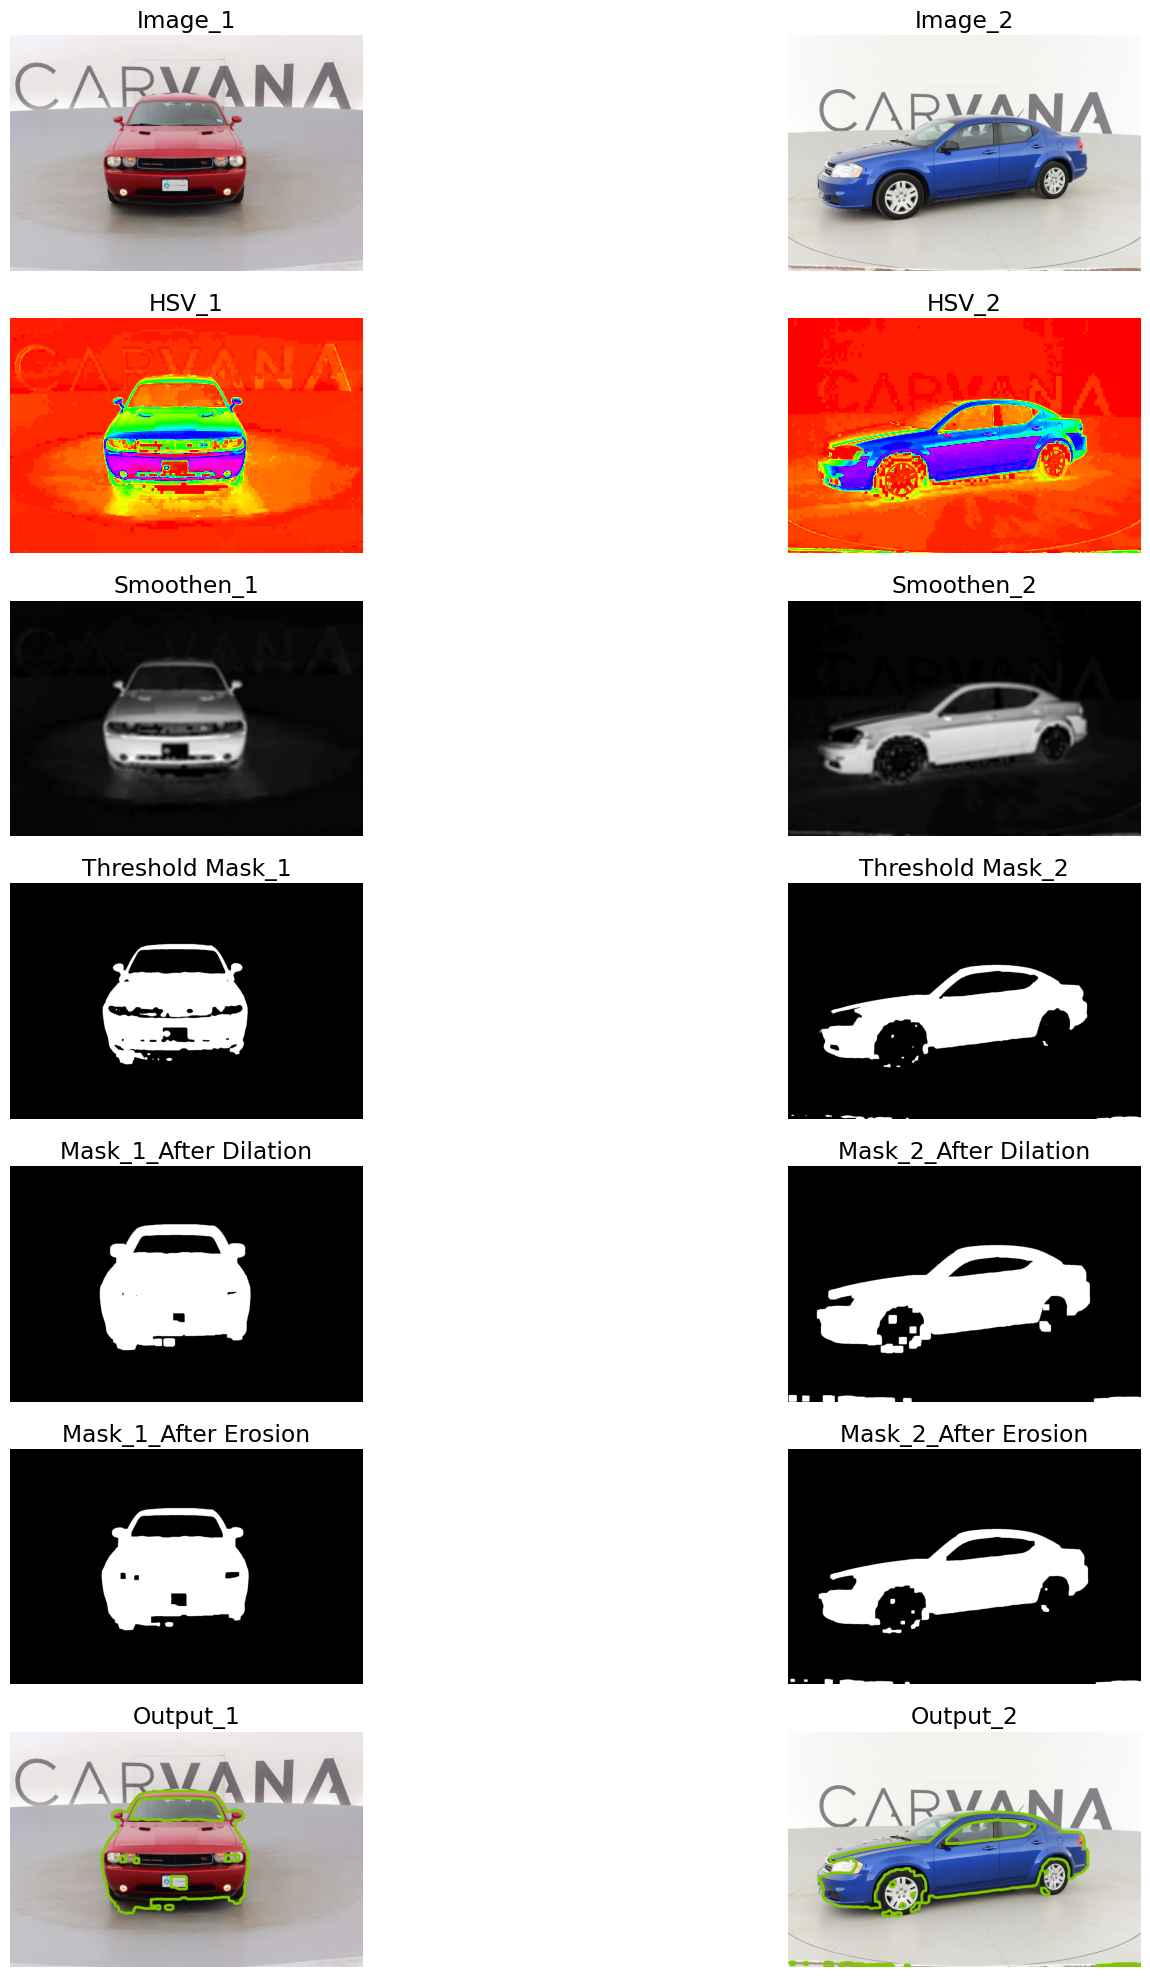

In [ ]:
fig,ax = plt.subplots(7,2,figsize=(20,20)) 
image_files  = ['car1.jpg','car3.jpg']

for idx,files in enumerate(image_files):
  img = cv2.imread(files)
  org_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
  img = cv2.cvtColor(org_img,cv2.COLOR_RGB2HSV)
  
  img = img[:,:,1]

  blurred_img = cv2.blur(img,(20,20))
  
  _,thresh_img = cv2.threshold(blurred_img,50,255,cv2.THRESH_BINARY)
  
  dilated = cv2.dilate(thresh_img,None,iterations= 15)
  eroded = cv2.erode(dilated,None,iterations= 10)
  
  contours,_ = cv2.findContours(eroded,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
  final_img = cv2.drawContours(org_img.copy(),contours, -1, (127,200,0), 13)
  
  ax[0,idx].set_title(f'Image_{idx+1}')
  ax[0,idx].imshow(org_img)
  ax[0,idx].axis(False) 

  ax[1,idx].set_title(f'HSV_{idx+1}')
  ax[1,idx].imshow(img,cmap='hsv')
  ax[1,idx].axis(False) 

  ax[2,idx].set_title(f'Smoothen_{idx+1}')
  ax[2,idx].imshow(blurred_img,cmap='gray')
  ax[2,idx].axis(False)

  ax[3,idx].set_title(f'Threshold Mask_{idx+1}')
  ax[3,idx].imshow(thresh_img,cmap='gray')
  ax[3,idx].axis(False)

  ax[4,idx].set_title(f'Mask_{idx+1}_After Dilation')
  ax[4,idx].imshow(dilated,cmap='gray')
  ax[4,idx].axis(False)

  ax[5,idx].set_title(f'Mask_{idx+1}_After Erosion')
  ax[5,idx].imshow(eroded,cmap='gray')
  ax[5,idx].axis(False)

  ax[6,idx].set_title(f'Output_{idx+1}')
  ax[6,idx].imshow(final_img)
  ax[6,idx].axis(False)   

plt.tight_layout()
plt.show()